In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import matplotlib.pyplot as plt


<Axes: xlabel='job_title_short'>

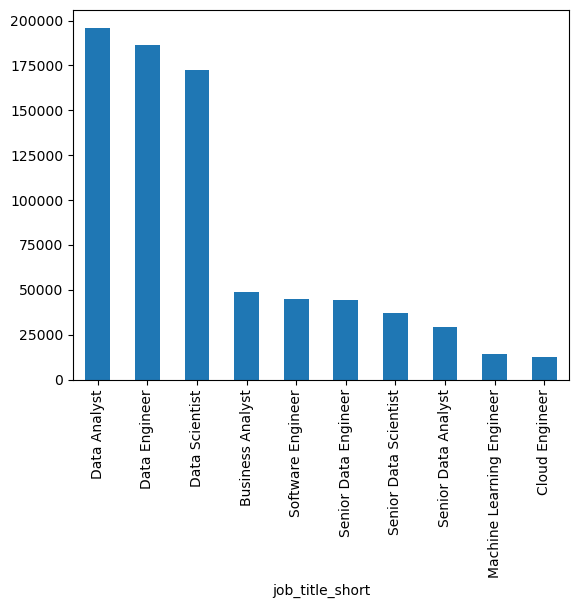

In [4]:
fig, ax = plt.subplots()
df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

In [5]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

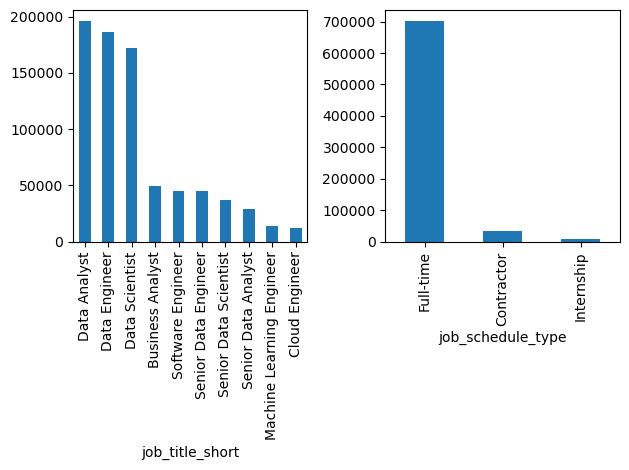

In [6]:
fig, ax = plt.subplots(1, 2)
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

fig.tight_layout()

In [7]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace = True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [8]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

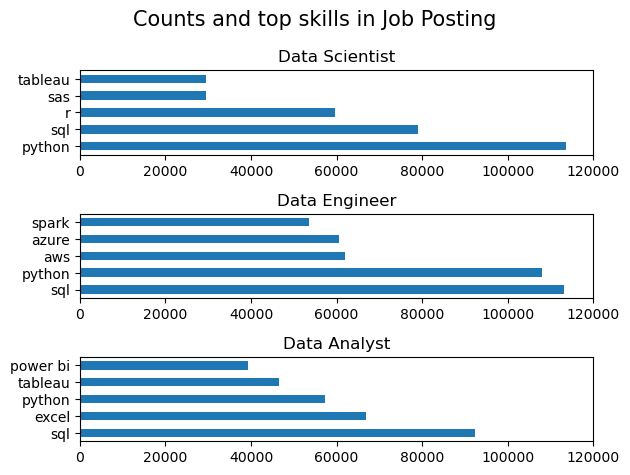

In [15]:
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
  df_plot = df_skills_count[df_skills_count['job_title_short']== job_title].head()
  df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
  ax[i].invert_yaxis()
  ax[i].set_ylabel('')
  ax[i].legend().set_visible(False)
  ax[i].set_xlim(0, 120_000)
fig.suptitle('Counts and top skills in Job Posting', fontsize=15)
fig.tight_layout()



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

# top 5 common job title in Germany and their top skills

In [11]:
df_common_job_germany = df[df['job_country']=='Germany'].copy()
df_common_job_germany = df_common_job_germany.explode('job_skills')
germany_job_skill = df_common_job_germany.groupby(['job_skills', 'job_title_short']).size()

df_germany_job_skill = germany_job_skill.reset_index(name='skill_count')
df_germany_job_skill.sort_values(by='skill_count', ascending=False, inplace = True)
df_germany_job_skill


,job_skills,job_title_short,skill_count
907,python,Data Scientist,4157
906,python,Data Engineer,3524
1139,sql,Data Engineer,3145
1138,sql,Data Analyst,2947
905,python,Data Analyst,2309
...,...,...,...
254,django,Business Analyst,1
255,django,Cloud Engineer,1
256,django,Data Analyst,1
1127,spring,Senior Data Scientist,1


In [12]:
germany_top_5_jobs = df_common_job_germany['job_title_short'].value_counts().head().index.tolist()
germany_top_5_jobs

['Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Senior Data Engineer',
 'Senior Data Scientist']

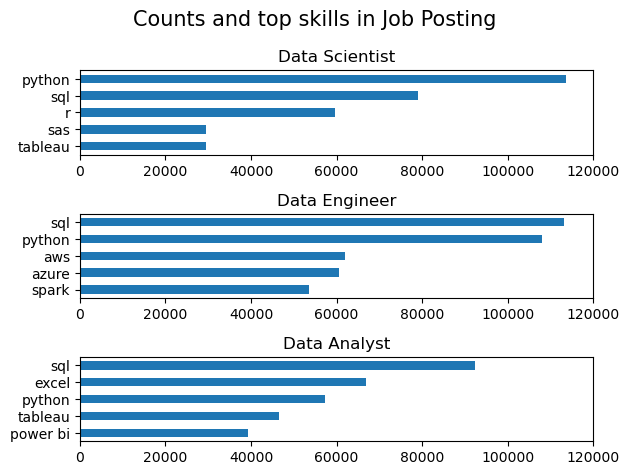

In [13]:
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
  df_plot = df_skills_count[df_skills_count['job_title_short']== job_title].head()
  df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
  ax[i].invert_yaxis()
  ax[i].set_ylabel('')
  ax[i].legend().set_visible(False)
  ax[i].set_xlim(0, 120_000)
fig.suptitle('Counts and top skills in Job Posting', fontsize=15)
fig.tight_layout()



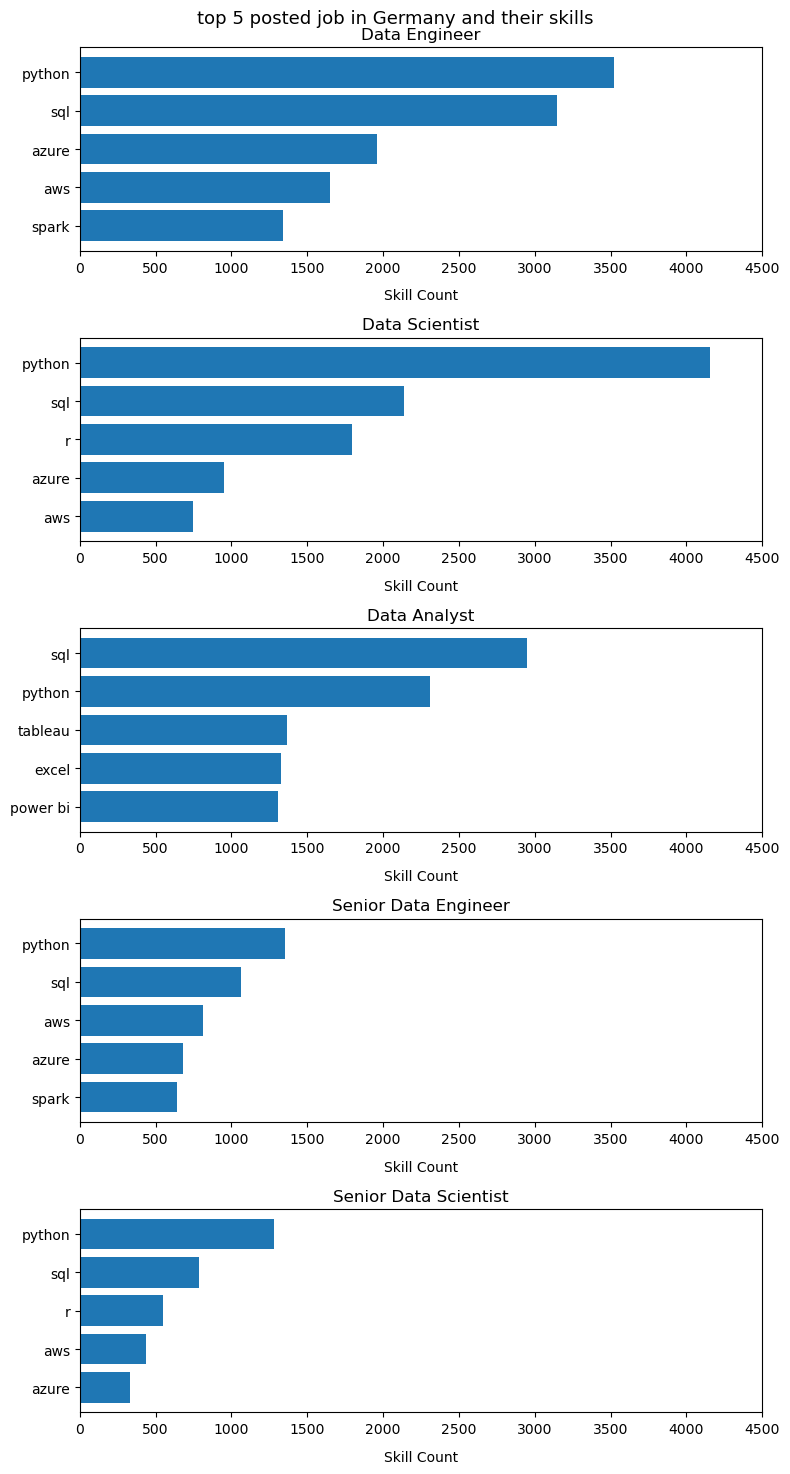

In [14]:
fig, ax = plt.subplots(5, 1, figsize=(8, 15))
for i, job_title in enumerate(germany_top_5_jobs):
  df_plot = df_germany_job_skill[df_germany_job_skill['job_title_short']==job_title].sort_values(by='skill_count', ascending=False).head(5)
  df_plot.plot(kind = 'barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title, width =0.8)
  ax[i].invert_yaxis()
  ax[i].set_ylabel('')
  ax[i].legend().set_visible(False)
  ax[i].set_xlim(0, 4500)
  ax[i].set_xlabel('Skill Count', labelpad=10)
fig.suptitle('top 5 posted job in Germany and their skills', fontsize=13)

fig.subplots_adjust(hspace = 0.5)
fig.tight_layout()

# paused at 8:29